# Distribuição Normal

A distribuição normal é muito importante em inteligencia artificial por possibilitar o cálculo de intervalos de confiança para as previsões dos modelos, por exemplo.

## Características da distribuição Normal

1. Seus parâmetros são a média $\mu$ e o desvio-padrão $\sigma$
2. É simétrica em relação à média $\mu$
3. É definida para valores reais de X que vão de $-\infty$ a $+\infty$

## Gráfico da distribuição Normal

In [2]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd
from scipy.stats import kstest

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

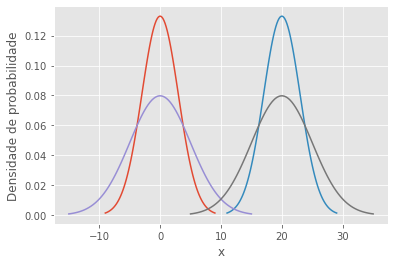

In [12]:
mu = 0
sigma = 3
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
#
mu = 20
sigma = 3
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
#
mu = 0
sigma = 5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
#
mu = 20
sigma = 5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
#
plt.xlabel('x')
plt.ylabel('Densidade de probabilidade')
plt.show()

# Verificação da normalidade de uma variável

1. Graficamente: o histograma obtido a partir de uma amostra é uma aproximação da distribuição de probabilidade dos dados
2. Numericamente: realizar um teste de aderência Kolmogorov-Smirnov, Anderson-Darling, Shapiro-Wilk

# Análise gráfica

In [14]:
np.random.seed(seed=0)
X = np.random.randn(1000)
#print(X)

In [15]:
hist, bin_edges = np.histogram(X, bins=10)

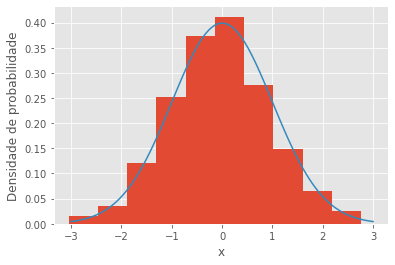

In [16]:
fig, ax = plt.subplots()
ax.hist(X, bin_edges, cumulative=False, density=True)
#média = 0 e desvio-padrão = 1
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
ax.set_xlabel('x')
ax.set_ylabel('Densidade de probabilidade')
plt.show()

# Análise numérica

# Testes de aderência:
## Testa a validade ou não da hipótese de aderência (ou hipótese nula $H_0$) em confronto com a hipótese alternativa $H_1$.

$H_0$: O modelo <font color='blue'> é adequado </font> para representar a distribuição da população.  
$H_1$: O modelo <font color='blue'> não é adequado </font> para representar a distribuição da população. 

Teste de hipótese Shapiro-Wilk: função 'stats.shapiro' retorna a estatística de teste W e o p-value. Se o resultado p-value é maior que 0,05 conclui-se que a distribuição nornal é adequada

In [17]:
stats.shapiro(X)

ShapiroResult(statistic=0.9985554218292236, pvalue=0.5911760330200195)

***
---
# <span style='color:Red'> Estudo sobre distribuições de probabilidade: Modelo Normal </span>

### <span style='background:yellow'> GoTo eslaide 13 - Semana 2.</span>
***
---

# Cálculo de probabilidades com a distribuição normal

Diversas variáveis "reais" têm seu comportamento descrito por uma distribuição normal
Exemplo: altura de um grupo de pessoas, peso de pacotes embalados em uma máquina, etc.

***

<span style='color :blue' > Exemplo: considere a variável X como o peso em quilogramas (kg) de uma grupo de pessoas adultas, sendo descrita por uma distribuição normal com média igual a 70kg e desvio-padrão de 10kg. Tem-se:</span>

Gráfico da distribuição:

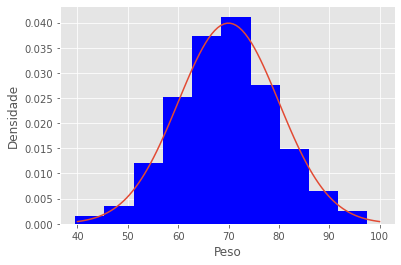

In [19]:
np.random.seed(seed=0)
xn = np.random.randn(1000)
peso = xn * 10 + 70;
hist, bin_edges = np.histogram(peso, bins=10)
fig, ax = plt.subplots()
ax.hist(peso, bin_edges, cumulative=False, density=True, color='blue')
#média = 70 e desvio-padrão = 10
mu = 70
sigma = 10
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
ax.set_xlabel('Peso')
ax.set_ylabel('Densidade')
plt.show()

<span style='color :red' >Qual a proporção de pessoas abaixo de 40 kg?</span>

In [54]:
##########################################################
# Função densidade de probabilidade: f(x)
# >>> stats.norm.pdf(x, loc, scale) 
# Função cumulativa de probabilidade: F(x)
# >>> stats.norm.cdf(x, loc, scale)
# na qual 'loc' é a média e 'scale' é o desvio-padrão
###########################################################
print("Densidade de probabilidade = ", stats.norm.pdf(40,70,10))
print("Probabilidade acumulada = ", stats.norm.cdf(40,70,10))

# P(peso < 40kg) = ? 
# Qual dos dois resultados? Por que? Acumulada P(peso < 40) ~= 0,135%

Densidade de probabilidade =  0.00044318484119380076
Probabilidade acumulada =  0.0013498980316300933


<span style='color :red'> Qual a proporção de pessoas acima de 90kg? </span>

In [55]:
# P(peso > 90kg) = ? 
1 - stats.norm.cdf(90,70,10)

0.02275013194817921

<span style='color :red' >Qual o intervalo de peso centralizado tal que contenha 95% de toda a população? </span>
***
Dica: ppf(q, loc=0, scale=1) = "Percent point function (inverse of cdf — percentiles)."
Função inversa: retorna o valor da variável (Z ou X) dada a probabilidade.
***

In [10]:
#calculo no espaço X
lb = stats.norm.ppf(0.025, 70, 10)
ub = stats.norm.ppf(0.975, 70, 10)
#calculo no espaço Z
lb = stats.norm.ppf(0.025)
ub = stats.norm.ppf(0.975)
print('Intervalo que contém 95% das pessoas = [', round(lb,3),',', round(ub,3), ']')

Intervalo que contém 95% das pessoas = [ -1.96 , 1.96 ]


# Exercícios

<span style = 'color:blue'> 1. Colete uma amostra de uma variável real na internet e avalie a normalidade de maneira gráfica e numérica. Pesquise e execute outros métodos para teste de normalidade em python.</span>

<span style = 'color:blue'> 2. O tempo gasto no exame vestibular de uma universidade tem distribuição  Normal, com média 120 min e desvio padrão 15 min.</span>    
a) Sorteando um aluno ao acaso, qual é a probabilidade que ele termine o exame antes de 100 minutos? <br /> b) Qual deve ser o tempo de prova de modo a permitir que 95% dos vestibulandos terminem no prazo estipulado?    
c) Qual é o intervalo central de tempo, tal que 80% dos estudantes gastam para completar o exame?

a) P(x < 100) = P(0 < x < 100) = F(x = 100) ~ função de acumulação: cdf

In [11]:
stats.norm.cdf(100, 120, 15)

0.09121121972586788

b) P(x < X) = 0.95 quem é X?

In [12]:
stats.norm.ppf(0.95, 120, 15)

144.67280440427209

c) P(Xlb < x < Xub) = 0.8 quem são Xlb e Xub? 

In [15]:
#Xlb
stats.norm.ppf(0.1, 120, 15)

100.77672651683099

In [16]:
#Xub
stats.norm.ppf(0.9, 120, 15)

139.223273483169

Intervalo: [100min; 140min]

***

# Teorema do Limite Central

## Seja $X$ uma variável aleatória que tem média $\mu$ e variância $\sigma^2$. <br />Para amostras $x_1, x_2, ..., x_n$, retiradas ao acaso e com reposição de $X$, a distribuição de probabilidade da média amostral ($\overline{X}$) aproxima-se, para $n$ grande, de uma distribuição normal, com média $\mu$ e variância $\sigma^2/n$,  ou seja,  <br /> $\overline{X} \sim N(\mu, \frac{\sigma^2}{n})$, para <span style = 'color:red'> $n$ suficientemente grande.</span>


***
# Atividade prática

A. Usando a geração de números aleatórios em python, conforme aula anterior, avalie graficamente e numericamente a distribuição de probabilidade da média amostral $\overline{X}$.
<br />
Você vai precisar de uma amostra de médias. Portanto, siga o seguinte roteiro: <br />
    
1. Gere um conjunto de 50 amostras aleatórias de tamanhos iguais a $n$;<br />
2. Calcule as médias das 50 amostras geradas;<br />
3. Crie o histograma para a amostra de 50 médias resultantes;<br />
4. Plote a curva da distribuição sobre o histograma;<br />
5. Realize o teste de aderência e avalie a normalidade.<br />

B. Realize as etapas de 1 a 5 acima para $n \in {5, 10, 20, 30, 50, 100}$. Discuta os resultados em função dessa variação de $n$. <br />
C. Execute os passos A e B para amostras obtidas a partir de variáveis X com duas diferentes distribuições (np.random.randn e numpy.random.exponential). Nesse caso, escolha funções diferentes para gerar o conjunto de amostras no item A.1. Existe alguma diferença nos resultados em função da distribuição de probabilidade da variável $X$ da qual as amostras foram retiradas?

D. Faça o upload do notebook com os resultados pelo Google ClassRoom da disciplina ou envie para o e-mail do professor: fabio.pea@gmail.com, até o dia 25/02/2023.

***

### Exemplo de geração de números aleatórios com as diferentes distribuições

In [15]:
# Normal padrão
n = 10
x = np.random.randn(n)
print(x)

[ 0.29803328  0.72747236  1.61859182  0.0881225   0.53352062  0.4544365
 -1.20819936  1.92763867 -2.01107992  1.801017  ]


In [17]:
# Exponencial
n = 5
x = np.random.exponential(1, n)
print(x)

[0.41248577 3.81627882 1.83231431 1.04442813 1.19620102]


In [4]:
stats.norm.ppf(0.9)

1.2815515655446004